___


- THIS NOTEBOOK MY PERSONAL COPY BASED ON THE NOTEBOOK FROM STUDY GROUPS ON 01/08/2020 and 01/09/2020
___


# LOADING IN BALTIMORE CRIME DATA FOR CLASS

In [113]:
# !pip install -U fsds
# from fsds.imports import *
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Project Notebook Settings
pd.set_option('display.max_columns',0)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-poster')

In [114]:
import fsds as fs
df = fs.datasets.load_ts_baltimore_crime_counts(
    read_csv_kwds={'parse_dates':['datetime']})
df.set_index('datetime',drop=False,inplace=True)
df

,datetime,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
datetime,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,22,0,9,20,19,2,34,15,3,0,2,1,8,2
2014-01-02,2014-01-02,6,0,7,28,23,3,26,10,0,1,1,1,4,0
2014-01-03,2014-01-03,11,0,3,13,17,1,16,6,0,0,1,1,2,1
2014-01-04,2014-01-04,14,0,14,20,23,0,23,15,0,0,1,1,7,0
2014-01-05,2014-01-05,9,0,11,14,22,0,19,13,1,2,0,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10,2019-12-10,17,0,9,14,12,1,26,11,0,1,0,5,7,3
2019-12-11,2019-12-11,16,0,14,7,15,0,23,7,0,1,0,1,4,5
2019-12-12,2019-12-12,9,1,11,8,18,0,16,7,0,0,1,0,5,1


In [115]:
import plotly.express as px
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [116]:
plot_cols =[col for col in df.drop('datetime',axis=1).columns]
plot_cols

['AGG. ASSAULT',
 'ARSON',
 'AUTO THEFT',
 'BURGLARY',
 'COMMON ASSAULT',
 'HOMICIDE',
 'LARCENY',
 'LARCENY FROM AUTO',
 'RAPE',
 'ROBBERY - CARJACKING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - RESIDENCE',
 'ROBBERY - STREET',
 'SHOOTING']

In [117]:
fig = px.line(df,x='datetime',y=plot_cols,
             template='plotly_dark')
fig

## LOADING FULL DATASET TO DEMO PREP

In [118]:
df2 = fs.datasets.load_ts_baltimore_crime_full()
df2

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1
1,12/14/2019,07:30:00,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1
2,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1
4,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286604,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
286605,05/01/1977,00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
286606,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,39.0,NaN,OTHER - INSIDE,NaN,1
286607,07/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534,NORTHERN,ROLAND PARK,-77.0,39.0,NaN,NaN,NaN,1


In [119]:
df2['datetime'] = pd.to_datetime(df2['CrimeDate']+'-'+df2['CrimeTime'])
df2

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,datetime
0,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1,2019-12-14 00:26:00
1,12/14/2019,07:30:00,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1,2019-12-14 07:30:00
2,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2019-12-14 14:30:00
3,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1,2019-12-14 14:15:00
4,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1,2019-12-14 04:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286604,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1978-01-01 10:30:00
286605,05/01/1977,00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1977-05-01 00:01:00
286606,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,39.0,NaN,OTHER - INSIDE,NaN,1,1975-06-01 00:00:00
286607,07/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534,NORTHERN,ROLAND PARK,-77.0,39.0,NaN,NaN,NaN,1,1969-07-20 21:00:00


In [120]:
df2.drop(columns=['CrimeDate','CrimeTime'],inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286609 entries, 0 to 286608
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CrimeCode        286609 non-null  object        
 1   Location         285342 non-null  object        
 2   Description      286609 non-null  object        
 3   Inside/Outside   254172 non-null  object        
 4   Weapon           60141 non-null   object        
 5   Post             284298 non-null  object        
 6   District         286609 non-null  object        
 7   Neighborhood     276194 non-null  object        
 8   Longitude        285031 non-null  float64       
 9   Latitude         285031 non-null  float64       
 10  Location 1       0 non-null       float64       
 11  Premise          253920 non-null  object        
 12  vri_name1        33866 non-null   object        
 13  Total Incidents  286609 non-null  int64         
 14  datetime         286

In [121]:
df2.nunique()

CrimeCode              81
Location            26901
Description            14
Inside/Outside          4
Weapon                  5
Post                  375
District               10
Neighborhood          278
Longitude               4
Latitude                3
Location 1              0
Premise               125
vri_name1               8
Total Incidents         1
datetime           187690
dtype: int64

In [122]:
df2['District'].value_counts(1,dropna=False)

NORTHEAST    0.151272
SOUTHEAST    0.143425
CENTRAL      0.113423
SOUTHERN     0.113154
NORTHERN     0.109965
SOUTHWEST    0.102596
NORTHWEST    0.098723
EASTERN      0.087391
WESTERN      0.079614
UNKNOWN      0.000436
Name: District, dtype: float64

<AxesSubplot:>

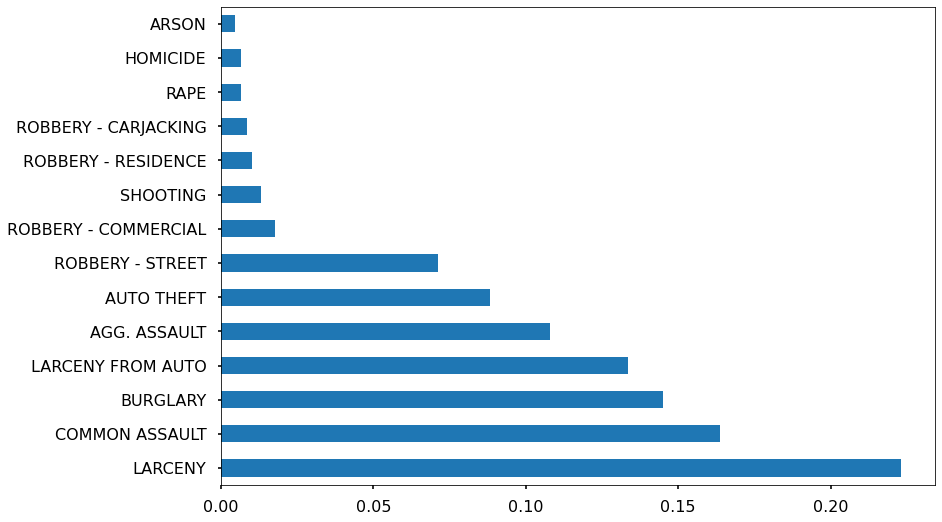

In [123]:
df2['Description'].value_counts(1).plot(kind='barh')

# Step 2: Preprocessing - By District

In [124]:
district_list = df2['District'].unique().tolist()
district_list

['NORTHERN',
 'SOUTHERN',
 'EASTERN',
 'CENTRAL',
 'SOUTHEAST',
 'SOUTHWEST',
 'WESTERN',
 'NORTHWEST',
 'NORTHEAST',
 'UNKNOWN']

In [125]:
df_ex = df2.groupby('District').get_group('EASTERN')
df_ex

,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,datetime
2,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2019-12-14 14:30:00
6,4C,1400 N DECKER AVE,AGG. ASSAULT,O,OTHER,332,EASTERN,BEREA,-77.0,39.0,NaN,STREET,NaN,1,2019-12-14 10:00:00
24,4E,1800 ORLEANS ST,COMMON ASSAULT,O,NaN,321,EASTERN,DUNBAR,-77.0,39.0,NaN,STREET,NaN,1,2019-12-14 05:15:00
32,4E,1100 WILMOT CT,COMMON ASSAULT,I,NaN,324,EASTERN,OLDTOWN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2019-12-14 09:40:00
35,6D,1000 BRENTWOOD AVE,LARCENY FROM AUTO,O,NaN,313,EASTERN,JOHNSTON SQUARE,-77.0,39.0,NaN,STREET,NaN,1,2019-12-14 18:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286564,2A,2600 LLEWELYN AVE,RAPE,I,OTHER,332,EASTERN,BEREA,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2010-01-01 00:01:00
286570,2A,1700 N PATTERSON PARK AVE,RAPE,I,OTHER,331,EASTERN,BROADWAY EAST,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2009-01-01 00:01:00
286572,2A,700 E 20TH ST,RAPE,I,OTHER,312,EASTERN,EAST BALTIMORE MIDWA,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2008-09-26 15:00:00
286577,2A,1700 E OLIVER ST,RAPE,I,OTHER,331,EASTERN,BROADWAY EAST,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1,2007-09-04 07:30:00


In [126]:
crime_list = list(df2['Description'].unique())
crime_list

['HOMICIDE',
 'ROBBERY - STREET',
 'ROBBERY - RESIDENCE',
 'AGG. ASSAULT',
 'BURGLARY',
 'LARCENY FROM AUTO',
 'AUTO THEFT',
 'LARCENY',
 'COMMON ASSAULT',
 'SHOOTING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - CARJACKING',
 'ARSON',
 'RAPE']

In [127]:
## MAKE A COLUMN FOR EACH CRIME
df = df2.copy()

for crime in crime_list:
    df[crime] = (df['Description'] == crime).astype(int)
    
df['total_crimes'] = df[crime_list].sum(axis=1)
crime_list.append('total_crimes')

df.set_index('datetime',drop=False,inplace=True)
display(df.isna().sum())
df


CrimeCode                    0
Location                  1267
Description                  0
Inside/Outside           32437
Weapon                  226468
Post                      2311
District                     0
Neighborhood             10415
Longitude                 1578
Latitude                  1578
Location 1              286609
Premise                  32689
vri_name1               252743
Total Incidents              0
datetime                    24
HOMICIDE                     0
ROBBERY - STREET             0
ROBBERY - RESIDENCE          0
AGG. ASSAULT                 0
BURGLARY                     0
LARCENY FROM AUTO            0
AUTO THEFT                   0
LARCENY                      0
COMMON ASSAULT               0
SHOOTING                     0
ROBBERY - COMMERCIAL         0
ROBBERY - CARJACKING         0
ARSON                        0
RAPE                         0
total_crimes                 0
dtype: int64

,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,datetime,HOMICIDE,ROBBERY - STREET,ROBBERY - RESIDENCE,AGG. ASSAULT,BURGLARY,LARCENY FROM AUTO,AUTO THEFT,LARCENY,COMMON ASSAULT,SHOOTING,ROBBERY - COMMERCIAL,ROBBERY - CARJACKING,ARSON,RAPE,total_crimes
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-14 00:26:00,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1,2019-12-14 00:26:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 07:30:00,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1,2019-12-14 07:30:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:30:00,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2019-12-14 14:30:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:15:00,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1,2019-12-14 14:15:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 04:03:00,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1,2019-12-14 04:03:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01 10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1978-01-01 10:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1977-05-01 00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1977-05-01 00:01:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1975-06-01 00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,39.0,NaN,OTHER - INSIDE,NaN,1,1975-06-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [128]:
df = df[['District',*crime_list]]#.groupby('District').resample('D').count()[crime_list]
df

,District,HOMICIDE,ROBBERY - STREET,ROBBERY - RESIDENCE,AGG. ASSAULT,BURGLARY,LARCENY FROM AUTO,AUTO THEFT,LARCENY,COMMON ASSAULT,SHOOTING,ROBBERY - COMMERCIAL,ROBBERY - CARJACKING,ARSON,RAPE,total_crimes
datetime,,,,,,,,,,,,,,,,
2019-12-14 00:26:00,NORTHERN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 07:30:00,SOUTHERN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:30:00,EASTERN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:15:00,CENTRAL,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 04:03:00,NORTHERN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01 10:30:00,NORTHEAST,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1977-05-01 00:01:00,NORTHERN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1975-06-01 00:00:00,SOUTHWEST,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [129]:
df= df.groupby(['District'],as_index=True).resample('M').count()#[crime_list].plot()
df

District  HOMICIDE  ROBBERY - STREET  ROBBERY - RESIDENCE  AGG. ASSAULT  ...  ROBBERY - COMMERCIAL  ROBBERY - CARJACKING  ARSON  RAPE  total_crimes
District datetime                                                                             ...                                                                       
CENTRAL  1980-07-31         1         1                 1                    1             1  ...                     1                     1      1     1             1
         1980-08-31         0         0                 0                    0             0  ...                     0                     0      0     0             0
         1980-09-30         0         0                 0                    0             0  ...                     0                     0      0     0             0
         1980-10-31         0         0                 0                    0             0  ...                     0                     0      0     0             0
         1980-11-30         0         0                 0                    0             0  ...                     0                     0      0     0             0
...                       ...       ...               ...                  ...           ...  ...                   ...                   ...    ...   ...           ...
WESTERN  2019-08-31       338       338               338                  338           338  ...                   338                   338    338   338           338
         2019-09-30       265       265               265                  265           265  ...                   265                   265    265   265           265
         2019-10-31       318       318               318                  318           318  ...                   318                   318    318   318           318
         2019-11-30       266       266               266                  266           266  ...                   266                   266    266   266           266
         2019-12-31        87        87                87                   87            87  ...                    87                    87     87    87            87

[4051 rows x 16 columns]

In [130]:
df.drop(columns=['District'],inplace=True)
df

HOMICIDE  ROBBERY - STREET  ROBBERY - RESIDENCE  AGG. ASSAULT  BURGLARY  ...  ROBBERY - COMMERCIAL  ROBBERY - CARJACKING  ARSON  RAPE  total_crimes
District datetime                                                                             ...                                                                       
CENTRAL  1980-07-31         1                 1                    1             1         1  ...                     1                     1      1     1             1
         1980-08-31         0                 0                    0             0         0  ...                     0                     0      0     0             0
         1980-09-30         0                 0                    0             0         0  ...                     0                     0      0     0             0
         1980-10-31         0                 0                    0             0         0  ...                     0                     0      0     0             0
         1980-11-30         0                 0                    0             0         0  ...                     0                     0      0     0             0
...                       ...               ...                  ...           ...       ...  ...                   ...                   ...    ...   ...           ...
WESTERN  2019-08-31       338               338                  338           338       338  ...                   338                   338    338   338           338
         2019-09-30       265               265                  265           265       265  ...                   265                   265    265   265           265
         2019-10-31       318               318                  318           318       318  ...                   318                   318    318   318           318
         2019-11-30       266               266                  266           266       266  ...                   266                   266    266   266           266
         2019-12-31        87                87                   87            87        87  ...                    87                    87     87    87            87

[4051 rows x 15 columns]

# BOOKMARK
- Test getting as monthly freq

In [131]:
df = df.reset_index(level=0)
df

,District,HOMICIDE,ROBBERY - STREET,ROBBERY - RESIDENCE,AGG. ASSAULT,BURGLARY,LARCENY FROM AUTO,AUTO THEFT,LARCENY,COMMON ASSAULT,SHOOTING,ROBBERY - COMMERCIAL,ROBBERY - CARJACKING,ARSON,RAPE,total_crimes
datetime,,,,,,,,,,,,,,,,
1980-07-31,CENTRAL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1980-08-31,CENTRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1980-09-30,CENTRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1980-10-31,CENTRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1980-11-30,CENTRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,WESTERN,338,338,338,338,338,338,338,338,338,338,338,338,338,338,338
2019-09-30,WESTERN,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265
2019-10-31,WESTERN,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318


In [132]:
TS = {}
for district in district_list:
    temp_df = df.groupby('District').get_group(district).sort_index()['total_crimes']
    temp_df
    TS[district] = temp_df#df.loc[district]
    

In [133]:
TS.keys()

dict_keys(['NORTHERN', 'SOUTHERN', 'EASTERN', 'CENTRAL', 'SOUTHEAST', 'SOUTHWEST', 'WESTERN', 'NORTHWEST', 'NORTHEAST', 'UNKNOWN'])

In [134]:
TS['EASTERN']

datetime
1988-05-31      1
1988-06-30      0
1988-07-31      0
1988-08-31      0
1988-09-30      0
             ... 
2019-08-31    390
2019-09-30    345
2019-10-31    343
2019-11-30    307
2019-12-31    118
Name: total_crimes, Length: 380, dtype: int64

In [135]:
df_ts = pd.DataFrame(TS)
df_ts

,NORTHERN,SOUTHERN,EASTERN,CENTRAL,SOUTHEAST,SOUTHWEST,WESTERN,NORTHWEST,NORTHEAST,UNKNOWN
datetime,,,,,,,,,,
1963-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1963-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1963-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1964-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1964-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-08-31,381.0,484.0,390.0,593.0,588.0,523.0,338.0,486,625.0,24.0
2019-09-30,480.0,444.0,345.0,515.0,548.0,462.0,265.0,458,614.0,2.0
2019-10-31,382.0,430.0,343.0,473.0,495.0,390.0,318.0,435,517.0,3.0


In [136]:
df_ts.isna().sum()

NORTHERN      69
SOUTHERN     351
EASTERN      295
CENTRAL      201
SOUTHEAST    379
SOUTHWEST    140
WESTERN      486
NORTHWEST      0
NORTHEAST    171
UNKNOWN      607
dtype: int64

In [137]:
df_ts.fillna(0,inplace=True)
df_ts.isna().sum()

NORTHERN     0
SOUTHERN     0
EASTERN      0
CENTRAL      0
SOUTHEAST    0
SOUTHWEST    0
WESTERN      0
NORTHWEST    0
NORTHEAST    0
UNKNOWN      0
dtype: int64

<AxesSubplot:xlabel='datetime'>

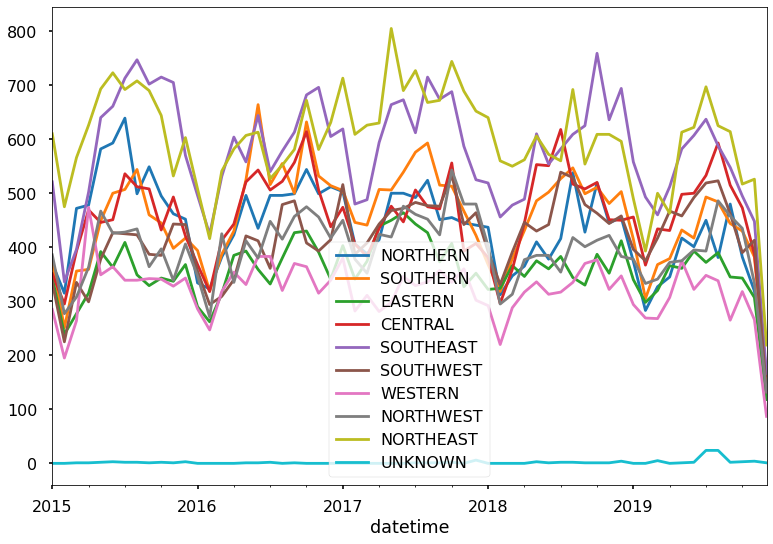

In [138]:
df_ts = df_ts.loc['2015':]
df_ts.plot()

In [139]:
split_idx = int(len(df_ts)*0.8//1)
split_idx

48

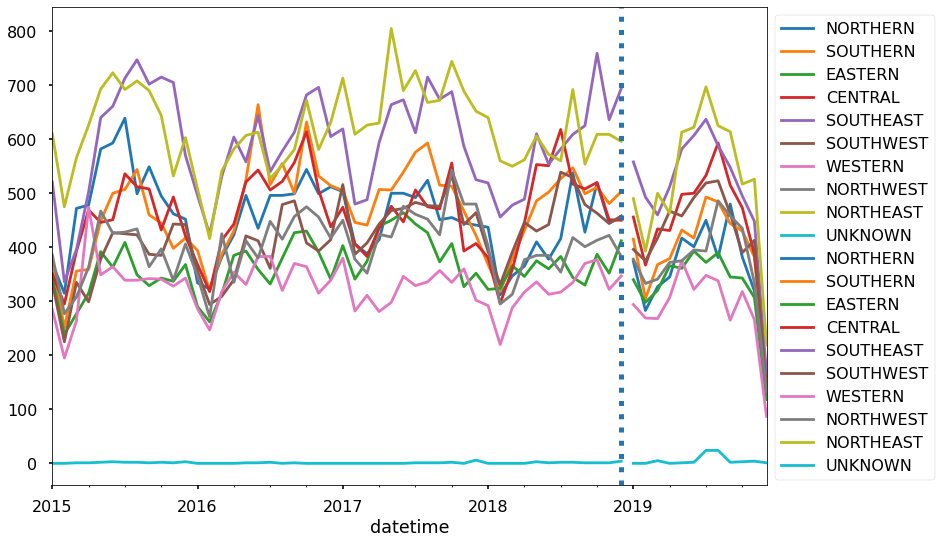

In [140]:
fig,ax= plt.subplots()
train = df_ts.iloc[:split_idx]
test = df_ts.iloc[split_idx:]
train.plot(ax=ax)
ax.axvline(train.index[-1],ls=':',lw=5)
test.plot(ax=ax)
ax.legend(bbox_to_anchor=[1,1])

# Step 3: EDA and Visualization

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot,lag_plot

In [142]:
def plot_acf_pacf(ts, figsize=(10,8),lags=20):
    fig,ax = plt.subplots(nrows=3,figsize=figsize)
    ts.plot(ax=ax[0])
    plot_acf(ts,ax=ax[1],lags=lags)
    plot_pacf(ts, ax=ax[2],lags=lags) 
    fig.tight_layout()
    
    fig.suptitle(f"Zipcode: {ts.name}",y=1.1,fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    


## ACF and PACF intuition for AR(p) and MA(q)

A quick overview of how higher order models affect the ACF and PACF functions

### AR(p)

Considering a time series that was generated by an autoregression (AR) process with an order of p, we would expect the ACF plot for the AR(p) time series to be strong to a lag of p and remain stagnant for subsequent lag values, trailing off at some point as the effect is weakened. The PACF, on the other hand, describes the direct relationship between an observation and its lag. This generally leads to no correlation for lag values beyond p.

### MA(q)

With a time series generated by a moving average (MA) process with an order q, we would expect the ACF for the MA(q) process to show a strong correlation with recent values up to the lag of q, then an immediate decline to minimal or no correlation. For the PACF, we would expect the plot to show a strong relationship to the lag and then a tailing off to no correlation from the lag onwards.


## ARMA models

Now that we've seen AR and MA models, it is important to note that **there is no reason why AR and MA models would not coexist**. That's where ARMA models come in, which basically means that in this model, a regression on past values takes place (AR part) and also that the error term is modeled as a linear combination of error terms of the recent past (MA part).
Generally, one denotes ARMA as ARMA(p,q).

An ARMA(2,1) model is given by:


 $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$


A short table to summarize ACF and PACF for AR(p), MA(q) and ARMA(p,q):


| Stat | AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |

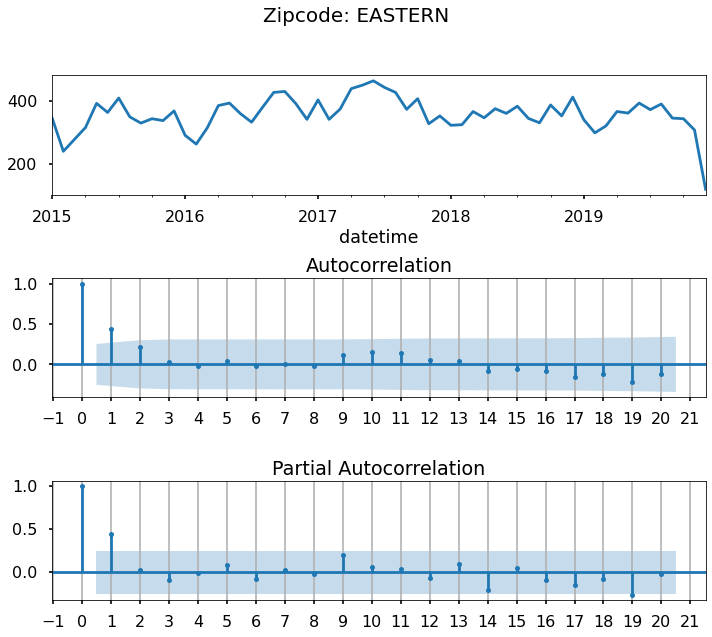

In [143]:
ts = df_ts['EASTERN']
plot_acf_pacf(ts)

### UPDATED INFO ON READING PACF/ACF FOR AR/MA
- **USE ACF TO JUDGE IF MA OR AR COMPONENTS:**
    - If lag 1 is positive: AR
    - If lag 1 is negatige: MA
    
- **PACF is best for picking AR (p)**
- **ACF is best for picking MA(q)**
    - If sharp drop off at lag of k (k= point on x axis) means use an AR model of order k.
    - If slow gradual decline: use MA
    
    
___
INFO FROM LESSONS:

- AR(p):
    - ACF for AR(p) would be strong until lag of p, then stagnant, then trail off. 
    - PACF for AR(p): Generally no correlation for lag values beyond p.
- MA(q):
    - ACF for MA(q) would show strong correlation up to a lag of q, the immedately delcine to minimal/no correction.
    - PACF would show strong relationship to the lag and tailing off to no correlation afterwards.
   
- Notation is generally ARMA(p,q)
- Example: ARMA(2,1) model equation
     $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$

| Param| AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |
    

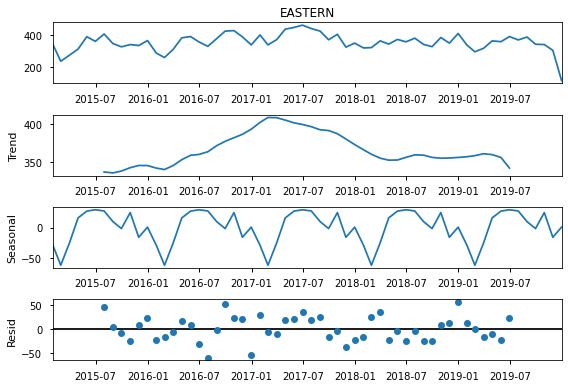

In [144]:
plt.style.use('seaborn-notebook')
# mpl.rcParams['figure.figsize']=(12,5)

decomp = seasonal_decompose(ts)
decomp.plot();
plt.tight_layout()

# Step 5: ARIMA Modeling

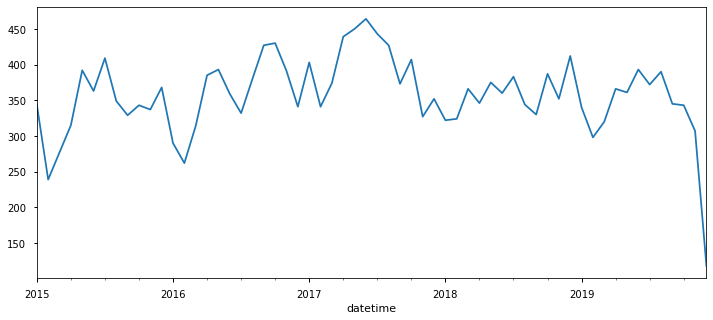

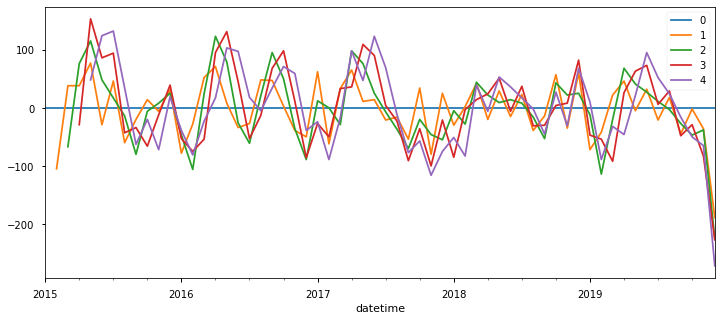

In [145]:
mpl.rcParams['figure.figsize']=(12,5)
ts.plot( )
plt.figure()
for i in range(5):
    ax = ts.diff(i).plot(label=i)
#     ax.set
ax.legend()

In [146]:
# import itertools

# p_range = range(0,10)
# q_range = range(0,10)
# d_range=range(1,3)
# m_range=(0,6,12)

# pdq = list(itertools.product(p_range,d_range,q_range))
# PDQM = list(itertools.product(p_range,d_range,q_range,m_range))
# PDQM[:10]

In [147]:
def make_pdq_pdqm(ps=[0,1,3],ds=[0,1,2,3], 
                  qs=[0,1,3],make_seasonal=True,
                  m_values=[6,12]):
    import itertools
#     ps =range(p_range[0],p_range[1])
#     ds =range(d_range[0],d_range[1])
#     qs =range(q_range[0],q_range[1])
    
    params = {}
    params['pdq'] = list(itertools.product(ps,ds,qs))
    
    if make_seasonal:
        params['PDQm'] = list(itertools.product(ps,ds,qs,m_values))
    return params

# fs.ihelp(ji.get_train_test_split_index,0)
def get_train_test_split_index(ts, TEST_SIZE=0.1,min_test_ts=2):
    import math
    idx_split = math.floor(len(ts.index)*(1-TEST_SIZE))
    
    num_test_ts=len(ts.iloc[idx_split:])
    if num_test_ts<min_test_ts:
        print(f'[!] Warning: using TEST_SIZE={TEST_SIZE} produced {num_test_ts} test timestamps.')
        print("- Overriding TEST_SIZE and using min_test_ts instead.")
        idx_split = len(ts)-min_test_ts
    
    return idx_split


def train_test_split_ts(ts,test_size=0.2,min_test_ts=2):
    idx_split = get_train_test_split_index(ts,TEST_SIZE=test_size,
                                           min_test_ts=min_test_ts)
    ts_train = ts.iloc[:idx_split]
    ts_test = ts.iloc[idx_split:]
    return ts_train, ts_test

def get_now(return_dt = True, return_str=True, show=False):
    import datetime as dt
    import tzlocal as tz
    now=dt.datetime.now(tz=tz.get_localzone())
    str_time =now.strftime('%m/%d/%Y - %I:%M:%S %p')
    if show:
        print(str_time)
    
    output=[]
    if return_dt:
        output.append(now)
        
    if return_str:
        output.append(str_time)
    return output[:]


    

In [148]:
params = make_pdq_pdqm()
print(params.keys())
print(params['pdq'][:10])
params['PDQm'][:10]

dict_keys(['pdq', 'PDQm'])
[(0, 0, 0), (0, 0, 1), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 3), (0, 3, 0)]


[(0, 0, 0, 6),
 (0, 0, 0, 12),
 (0, 0, 1, 6),
 (0, 0, 1, 12),
 (0, 0, 3, 6),
 (0, 0, 3, 12),
 (0, 1, 0, 6),
 (0, 1, 0, 12),
 (0, 1, 1, 6),
 (0, 1, 1, 12)]

### Old Grid Search Functions

In [149]:
# def get_now(return_dt = True, return_str=True, show=False):
#     import datetime as dt
#     import tzlocal as tz
#     now=dt.datetime.now(tz=tz.get_localzone())
#     str_time =now.strftime('%m/%d/%Y - %I:%M:%S %p')
#     if show:
#         print(str_time)
    
#     output=[]
#     if return_dt:
#         output.append(now)
        
#     if return_str:
#         output.append(str_time)
#     return output[:]


# from statsmodels.tsa.statespace.sarimax import SARIMAX
# def grid_search_sarimax(ts_train,pdq=None,pdqm=None,order_dict=None,
#                         verbose=False, model_kws={}):

#     from tqdm import trange
    
#     if (pdq is None) & (order_dict is not None):
#         pdq= order_dict['pdq']
#     if (pdqm is None) & (order_dict is not None):
#         pdqm= order_dict['PDQm']

# #     import tqdm
# #     from tqdm import trange

#     start,start_str = get_now(return_dt=True, return_str=True)
#     print(f'[i] STARTING GRID SEARCH @ {start_str}:')

#     res = [['pdq','PDQM','AIC']]
#     for i in trange((len(pdq))):
#         comb = pdq[i]
        
#         for combs in pdqm:
#             try: 
#                 model = SARIMAX(ts_train, order=comb, 
#                                seasonal_order =combs,enforce_stationarity=False,
#                                enforce_invertibility=False,**model_kws)
                
#                 output= model.fit()
#                 res.append([comb,combs,output.aic])
#             except:
#                 if verbose:
#                     print(f"[!] Error running ({comb})({combs})")
#                 continue
#     end,end_str = get_now(return_dt=True, return_str=True)
#     elapsed = end-start
#     print(f"[i] GRID SEARCH FINISHED AT {end_str}")
#     print(f"\tTotal Time: {elapsed}")

#     try:
#         df_res =fs.list2df(res)
#         return df_res
    
#     except:
#         print('Error converting to df. Returning as list.')
#         return res 

In [150]:
# res = grid_search_sarimax(ts_train,order_dict=params)#pdq,pdqm)
# res

### New Grid Search Functions

In [151]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def grid_search_arima_optional_s(ts_train,pdq=None,pdqm=None,order_dict=None,
                                 make_seasonal=False, verbose=False, model_kws={}):

    from tqdm import trange
    
    if (pdq is None) & (order_dict is not None):
        pdq= order_dict['pdq']
    if (pdqm is None) & (order_dict is not None):
        pdqm= order_dict['PDQm']

#     import tqdm
#     from tqdm import trange

    start,start_str = get_now(return_dt=True, return_str=True)
    print(f'[i] STARTING GRID SEARCH @ {start_str}:')
    
    
    res = [['pdq','PDQM','AIC']]
    for i in trange((len(pdq))):
        comb = pdq[i]
        
     
        ## BRANCH POINT
        if make_seasonal:
            for combs in pdqm:
                try: 
                    model = SARIMAX(ts_train, order=comb, 
                                   seasonal_order =combs,enforce_stationarity=False,
                                   enforce_invertibility=False,**model_kws)

                    output= model.fit()
                    res.append([comb,combs,output.aic])
                except:
                    if verbose:
                        print(f"[!] Error running ({comb})({combs})")
                    continue
                    
                    
        if make_seasonal == False:
            try: 
                model = SARIMAX(ts_train, order=comb, 
                                enforce_stationarity=False, 
                                enforce_invertibility=False,**model_kws)

                output= model.fit()
                res.append([comb,'N/A',output.aic])
            except:
                if verbose:
                    print(f"[!] Error running ({comb})({combs})")
                    continue
                    
    end,end_str = get_now(return_dt=True, return_str=True)
    elapsed = end-start
    print(f"[i] GRID SEARCH FINISHED AT {end_str}")
    print(f"\tTotal Time: {elapsed}")

    try:
        df_res =pd.DataFrame(res[1:], columns=res[0])
        return df_res
    
    except:
        print('Error converting to df. Returning as list.')
        return res 

### Testing on Single Zipcode

In [152]:
# ts = tsdict[21201]
ts_train,ts_test = train_test_split_ts(ts,test_size=0.1)

len(ts_train),len(ts_test)

(54, 6)

In [153]:
res = grid_search_arima_optional_s(ts_train,order_dict=params,
                                   make_seasonal=False)#pdq,pdqm)
res.sort_values('AIC',inplace=True)
res

  8%|▊         | 3/36 [00:00<00:01, 21.62it/s]

[i] STARTING GRID SEARCH @ 12/09/2020 - 09:17:52 PM:


100%|██████████| 36/36 [00:02<00:00, 16.84it/s]

[i] GRID SEARCH FINISHED AT 12/09/2020 - 09:17:55 PM
	Total Time: 0:00:02.138873


,pdq,PDQM,AIC
5,"(0, 1, 3)",N/A,498.905359
17,"(1, 1, 3)",N/A,500.710714
11,"(0, 3, 3)",N/A,501.329450
23,"(1, 3, 3)",N/A,501.612278
8,"(0, 2, 3)",N/A,502.446450
29,"(3, 1, 3)",N/A,502.483830
35,"(3, 3, 3)",N/A,504.796469
20,"(1, 2, 3)",N/A,505.648253
32,"(3, 2, 3)",N/A,506.051531
14,"(1, 0, 3)",N/A,513.374614


In [154]:
best_params =  dict(order=res.iloc[0].loc['pdq'])
best_params

{'order': (0, 1, 3)}

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                EASTERN   No. Observations:                   54
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -245.453
Date:                Wed, 09 Dec 2020   AIC                            498.905
Time:                        21:18:00   BIC                            506.473
Sample:                    01-31-2015   HQIC                           501.776
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4987    416.713     -0.001      0.999    -817.241     816.243
ma.L2         -0.0460    208.945     -0.000      1.000    -409.571     409.479
ma.L3         -0.4553    189.744     -0.002      0.998    -372.347     371.436
sigma2      1239.9271   5.17e+05      0.002      0.998   -1.01e+06    1.01e+06
===================================================================================
Ljung-Box (Q):                       38.37   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.54   Prob(JB):                         0.76
Heteroskedasticity (H):               0.73   Skew:                             0.12
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

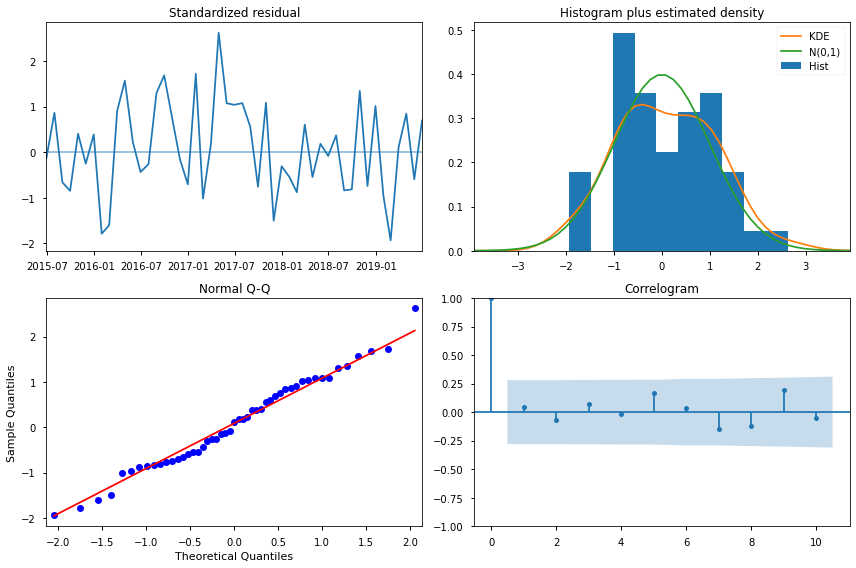

In [155]:
model_output = SARIMAX(ts_train,**best_params,
                      enforce_invertibility=False,
                      enforce_stationarity=False,).fit()
display(model_output.summary())
model_output.plot_diagnostics(figsize=(12,8));
plt.tight_layout()

### def roi and model evaluation functions

In [156]:
def model_evaluation(ts_true,ts_pred,show=True,show_u_info=False):
    from sklearn.metrics import mean_squared_error,r2_score

    res= [['Metric','Value']]
    
    res.append(['RMSE', np.sqrt(mean_squared_error(ts_true,ts_pred))])
    
    res.append(['R2',r2_score(ts_true,ts_pred)])
    res.append(["Thiel's U",fs.jmi.thiels_U(ts_true,ts_pred,
                                            display_equation=show_u_info,
                                           display_table=show_u_info)])
    res = pd.DataFrame(res[1:],columns=res[0])#fs.list2df(res)
    
    if show:
        display(res)
    return res
    
def expected_roi(investment, final_value):
    """This function takes in a series of forecasts to predict the return
    on investment spanning the entire forecast."""
    roi = np.round(((final_value - investment) / investment)*100,3)
    return roi


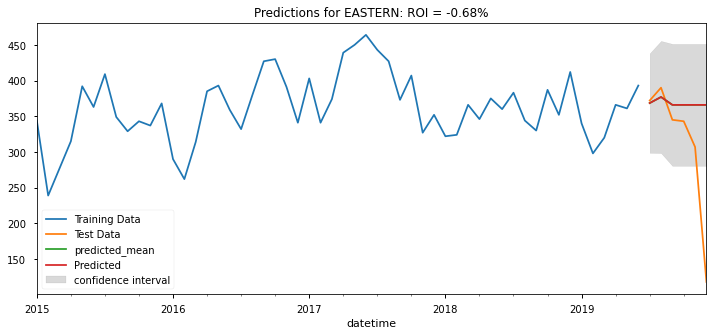

,Metric,Value
0,RMSE,104.960229
1,R2,-0.338231
2,Thiel's U,1.304456


,lower EASTERN,upper EASTERN,predicted_mean
2019-07-31,298.782937,438.123047,368.452992
2019-08-31,298.473218,455.505804,376.989511
2019-09-30,280.534891,451.359788,365.947339
2019-10-31,280.534891,451.359788,365.947339
2019-11-30,280.534891,451.359788,365.947339
2019-12-31,280.534891,451.359788,365.947339


In [157]:
def get_model_preds_df(model_output,ts_train,ts_test,start=None,end=None, get_metrics=True):
    
    if start is None:
        start=ts_test.index[0]
        
    if end is None:
        end=ts_test.index[-1]    
    # Get predictions starting from 2016 and calculate confidence intervals.
    prediction = model_output.get_prediction(start=start,end=end, 
                                             dynamic=True)
    
    
    preds_df = prediction.conf_int()
    preds_df['predicted_mean'] = prediction.predicted_mean
    plot_df = pd.concat([preds_df,ts_train],axis=1)

    
    ## Get roi for preds:
    roi = expected_roi(preds_df['predicted_mean'].iloc[0],preds_df['predicted_mean'].iloc[-1])
    
    zc =ts_train.name
    
    fig, ax = plt.subplots()
    ts_train.plot(ax=ax,label='Training Data')
    ts_test.plot(ax=ax,label='Test Data')

    
    preds_df['predicted_mean'].plot(ax=ax)
    ax.fill_between(preds_df.index, preds_df[f'lower {zc}'],
                preds_df[f'upper {zc}'], color="k", alpha=.15,
                label = 'confidence interval')

    prediction.predicted_mean.plot(ax=ax,label='Predicted')
    
    
    ax.legend()
    ax.set(title=f"Predictions for {zc}: ROI = {roi}%")
    
    fig = ax.get_figure()
    
    
    plot_df['zipcode']=ts_train.name
    plt.show()
    
    if get_metrics:
        res = model_evaluation(ts_test, preds_df['predicted_mean'])
#         res['Metric']

    return preds_df, fig,ax
    
preds_df,fig,ax = get_model_preds_df(model_output,ts_train,ts_test)
preds_df

### 21202

In [158]:
# zipname = 21202
# zip21202 = {}
# zip21202['ts'] = tsdict[zipname].loc['2009':]
# for k,v in ts_resdict[zipname].items():
    
#     zip21202[k]  = v
# zip21202.keys()

In [ ]:
# pred = zip21202['model'].get_forecast(32)
# pred.conf_int()

In [ ]:

# f,ax = plt.subplots()
# zip21202['ts'].plot(ax=ax,label=zipname)
# zip21202['preds_df']['predicted_mean'].plot(ax=ax,label='prediction')
# ax.fill_between(zip21202['preds_df'].index, zip21202['preds_df'][f'lower {zipname}'],
#                 zip21202['preds_df'][f'upper {zipname}'], color="k", alpha=.15,
#                 label = 'confidence interval')
# ax.legend()

## META GRID SEARCH

In [ ]:
fig,ax,tsdict = plot_ts_dict(BCTY)

In [ ]:
print(ts.index[0])
ts.index[0]+ pd.to_timedelta(1,'MS')
end=ts.index[0]+ pd.to_timedelta(1,'MS')
pd.to_datetime(end)

In [ ]:
### META SERACH
params = make_pdq_pdqm()

ts_resdict = {}
for zc,ts in tsdict.items():
    print('\n')
    print('---'*30)
    print('---'*30)
    print(f'ZIPCODE: {zc}')
    ## Train test split
    ts_train,ts_test = train_test_split_ts(ts,test_size=0.1)
    

    ## Grid search
    res = grid_search_arima_optional_s(ts_train,order_dict=params,make_seasonal=False)#pdq,pdqm)
    res.sort_values('AIC',inplace=True)
    best_params =  dict(order=res.iloc[0].loc['pdq'])
    
    ts_resdict[zc]={}
    ts_resdict[zc]['res']=res
    ts_resdict[zc]['best_params'] = best_params
    print('Best params: ',best_params)
    

    ## Using best params
    model_output = SARIMAX(ts_train,**best_params,
                      enforce_invertibility=False,
                      enforce_stationarity=False).fit()
    ts_resdict[zc]['model'] = model_output
    
    preds_df,fig,ax = get_model_preds_df(model_output,ts_train,ts_test)
    ts_resdict[zc]['preds_df'] = preds_df


In [ ]:
# ts_resdict.keys()
# ts_resdict[21215].keys()
# ts_resdict[21215]['preds_df']

# Step 6: Interpreting Results

## ADDING FORECAST BASED ON FULL DATA INTO FUTURE

In [ ]:
### META SERACH
params = make_pdq_pdqm()

ts_resdict = {}
for zc,ts in tsdict.items():
    print('\n')
    print('---'*30)
    print('---'*30)
    print(f'ZIPCODE: {zc}')
    ## Train test split
    ts_train,ts_test = train_test_split_ts(ts,test_size=0.1)
    

    ## Grid search
    res = grid_search_arima_optional_s(ts_train,order_dict=params,make_seasonal=False)#pdq,pdqm)
    res.sort_values('AIC',inplace=True)
    best_params =  dict(order=res.iloc[0].loc['pdq'])
    
    ts_resdict[zc]={}
    ts_resdict[zc]['res']=res
    ts_resdict[zc]['best_params'] = best_params
    print('Best params: ',best_params)
    

    ## Using best params
    model_output = SARIMAX(ts,**best_params,
                      enforce_invertibility=False,
                      enforce_stationarity=False).fit()
    ts_resdict[zc]['model'] = model_output
    
    preds_df,fig,ax = get_model_preds_df(model_output,ts_train,ts_test,
                                         start=ts.index[-1],end=ts.index.shift(12)[-1],get_metrics=False)#+ pd.to_timedelta(1,'MS'))
    ts_resdict[zc]['preds_df'] = preds_df


# END OF STUDY GROUP 01/09/2020

In [ ]:
print(ts_resdict[21202].keys())
ts_resdict[21202]['preds_df']


In [ ]:
top_params = res.sort_values('AIC').head(10)
display(top_params)
top_params=top_params.loc[top_params['AIC']>0]

best_params =  dict(order=top_params.iloc[0].loc['pdq'],
             seasonal_order = top_params.iloc[0].loc['PDQM']) 
# pd.DataFrame.from_dict(best_params)
best_params

In [ ]:
len(ts_train)

In [ ]:
best_params

In [ ]:
len(ts_train)

In [ ]:
# best_params['seasonal_order'] = (4, 1, 4, 12)
# best_params

In [ ]:
# model_output = SARIMAX(ts_train,**best_params,
#                       enforce_invertibility=False,
#                       enforce_stationarity=False).fit()


In [ ]:
forecast = model_output.forecast(steps=len(ts_test))
forecast

In [ ]:
model_output.summary()

In [ ]:
preds = model_output.predict(start=ts_test.index[0],end=ts_test.index[-1])

In [ ]:
preds

In [ ]:
f,ax=plt.subplots()
ts_train.plot(ax=ax)
ts_test.plot(ax=ax)
# forecast.plot(ax=ax,ls=':',lw=3)
preds.dropna().plot(ax=ax)
ax.legend()

In [ ]:
from fsds.jmi import thiels_U

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
# fs.jmi.thiels_U

def model_evaluation(ts_true,ts_pred,show=True):
    res= [['Metric','Value']]
    
    res.append(['RMSE', np.sqrt(mean_squared_error(ts_true,ts_pred))])
    
    res.append(['R2',r2_score(ts_true,ts_pred)])
    res.append(["Thiel's U",fs.jmi.thiels_U(ts_true,ts_pred)])
    res = pd.DataFrame(res[1:],columns=res[0])
    if show:
        display(res)
    return res
    
def plot_true_test_preds(ts_train,ts_test,ts_preds):
    f,ax=plt.subplots()
    ts_train.plot(ax=ax)
    ts_test.plot(ax=ax)
    # forecast.plot(ax=ax,ls=':',lw=3)
    preds.dropna().plot(ax=ax)
    ax.legend()
    return f,ax

In [ ]:
model_evaluation(ts_test, preds)
plot_true_test_preds(ts_train,ts_test,preds)

In [ ]:
plot_true_test_preds()